In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#import plotly.plotly as py
#import plotly.graph_objs as go

In [3]:
movie = pd.read_csv('movies.csv')
movie.set_index('movieId',inplace=True)
movie

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
162672,Mohenjo Daro (2016),Adventure|Drama|Romance
163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary


In [4]:
rating = pd.read_csv('ratings.csv')
rating.set_index('movieId',inplace=True)
rating

,userId,rating,timestamp
movieId,,,
1,0,4.5,1260759144
2,0,4.0,1260759144
13,0,4.7,1260759144
7,0,1.5,1260759144
25,0,1.3,1260759144
...,...,...,...
6268,671,2.5,1065579370
6269,671,4.0,1065149201
6365,671,4.0,1070940363


In [5]:
link = pd.read_csv('links.csv',usecols = range(2))
link.set_index('movieId', inplace=True)
link

,imdbId
movieId,
1,114709
2,113497
3,113228
4,114885
5,113041
...,...
162672,3859980
163056,4262980
163949,2531318


In [6]:
movie_ratings = pd.merge(movie,rating,on='movieId')

In [7]:
movie_ratings = pd.merge(movie_ratings,link,on='movieId')
movie_ratings

,title,genres,userId,rating,timestamp,imdbId
movieId,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,4.5,1260759144,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,114709
...,...,...,...,...,...,...
161944,The Last Brickmaker in America (2001),Drama,287,5.0,1470167824,255313
162376,Stranger Things,Drama,73,4.5,1474255532,4574334
162542,Rustom (2016),Romance|Thriller,611,5.0,1471520667,5165344


In [8]:
movie_ratings.loc[movie_ratings['rating'] >= 3.5]

,title,genres,userId,rating,timestamp,imdbId
movieId,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,4.5,1260759144,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20,3.5,1238729767,114709
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,26,5.0,1360087980,114709
...,...,...,...,...,...,...
160718,Piper (2016),Animation,547,4.0,1469713151,5613056
161944,The Last Brickmaker in America (2001),Drama,287,5.0,1470167824,255313
162376,Stranger Things,Drama,73,4.5,1474255532,4574334


In [9]:
#average = movie_ratings[['rating']].where(movie_ratings[['movieId']].values == '1').stack().mean()
overall_ratings = movie_ratings.groupby('movieId', as_index=True).rating.mean()
overall_ratings = overall_ratings.to_frame();

In [10]:
overall_ratings

,rating
movieId,
1,3.875000
2,3.407407
3,3.161017
4,2.384615
5,3.267857
...,...
161944,5.000000
162376,4.500000
162542,5.000000


In [11]:
for_suggestion = movie_ratings.drop(labels=None, axis=0, index=None, columns={'userId','rating','timestamp'}, level=None, inplace=False, errors='raise')

In [12]:
userRatings = movie_ratings.pivot_table(index={'userId'}, columns={'title'}, values='rating')
userRatings

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
corrMatrix = userRatings.corr()
corrMatrix

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$9.99 (2008),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies (1934),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944911,NaN,0.424179,...,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-0.461163,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
¡Three Amigos! (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404226,NaN,-0.617213,...,NaN,NaN,NaN,0.043321,NaN,-0.461163,NaN,1.000000,NaN,NaN


In [14]:
corrMatrix = userRatings.corr(method='pearson', min_periods=50)
corrMatrix.head(10)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$9.99 (2008),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies (1934),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
userID = int(input("Enter User ID :  "))

Enter User ID :  0


In [16]:
myRatings = userRatings.loc[userID].dropna()
myRatings

title
Balto (1995)                4.7
Casper (1995)               5.0
Jumanji (1995)              4.0
Leaving Las Vegas (1995)    1.3
Sabrina (1995)              1.5
Toy Story (1995)            4.5
Name: 0, dtype: float64

In [17]:
type(myRatings)

pandas.core.series.Series

In [16]:
to_be_dropped = myRatings.index
print(to_be_dropped)

Index(['Balto (1995)', 'Casper (1995)', 'Jumanji (1995)',
       'Leaving Las Vegas (1995)', 'Sabrina (1995)', 'Toy Story (1995)'],
      dtype='object', name='title')


In [17]:
simCandidates = pd.Series()

for i in range(0, len(myRatings.index)):
    print("Adding sims for "+myRatings.index[i]+"...")
    #Retrieve similar movies to one that user rated 
    sims = corrMatrix[myRatings.index[i]].dropna()
    #In above line dropna is used 'cause we don't want to take movies with NaN values
    #Now scale its similarity by how well user rated this movie
    sims = sims.map(lambda x:x * myRatings[i])
    #Add the score to the list of similarity candidates
    simCandidates = simCandidates.append(sims)
    
#Our RESULTS so far...
print("\n\nsorting...\n")
print("The movies suggested for you are ...\n")
simCandidates.sort_values(inplace=True, ascending=False)

#print(simCandidates[:10])
simCandidates
#print(simCandidates[-10:])

Adding sims for Balto (1995)...
Adding sims for Casper (1995)...
Adding sims for Jumanji (1995)...
Adding sims for Leaving Las Vegas (1995)...
Adding sims for Sabrina (1995)...
Adding sims for Toy Story (1995)...


sorting...

The movies suggested for you are ...



Casper (1995)                                                                                     5.000000
Toy Story (1995)                                                                                  4.500000
Jumanji (1995)                                                                                    4.000000
Toy Story 2 (1999)                                                                                3.345086
Bug's Life, A (1998)                                                                              3.047846
Mummy, The (1999)                                                                                 2.567678
Monsters, Inc. (2001)                                                                             2.473121
Sin City (2005)                                                                                   2.453954
Dark Knight, The (2008)                                                                           2.434403
Finding Nemo (2003)                  

In [18]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace=True, ascending=False)
suggested = pd.DataFrame({'title':simCandidates.index, 'rating':simCandidates.values})

In [19]:
suggested.set_index('title', inplace=True)
suggested = pd.merge(suggested,for_suggestion,on='title')
suggested.set_index('title',inplace=False)
suggested = suggested.drop_duplicates()
suggested = suggested.rename(columns={'rating':'similarity_factor'})
suggested.set_index('imdbId',inplace=True)
suggested

,title,similarity_factor,genres
imdbId,,,
114709,Toy Story (1995),6.377956,Adventure|Animation|Children|Comedy|Fantasy
113497,Jumanji (1995),5.659517,Adventure|Children|Fantasy
112642,Casper (1995),5.000000,Adventure|Children
126029,Shrek (2001),3.872738,Adventure|Animation|Children|Comedy|Fantasy|Ro...
110357,"Lion King, The (1994)",3.640019,Adventure|Animation|Children|Drama|Musical|IMAX
112431,Babe (1995),3.598206,Children|Drama
103639,Aladdin (1992),3.586495,Adventure|Animation|Children|Comedy|Musical
107290,Jurassic Park (1993),3.551264,Action|Adventure|Sci-Fi|Thriller
110475,"Mask, The (1994)",3.376247,Action|Comedy|Crime|Fantasy


In [20]:
#filteredSims = simCandidates.drop(labels = myRatings.index)
#filteredSims

In [21]:
#Below is a code for genre related search
genre = input("Enter genre to be searched  :  ")

Enter genre to be searched  :  Action


In [22]:
genre_specific = movie[movie['genres'].str.contains(genre)]

genre_specific = pd.merge(genre_specific,link,on='movieId')
genre_specific = pd.merge(genre_specific,overall_ratings,on='movieId')

genre_specific = genre_specific.sort_values('rating', ascending=False)

genre_specific
#genre_specific.set_index('movieId', inplace=True).....no need of this...as movieId is already index

,title,genres,imdbId,rating
movieId,,,,
4717,"Battle Creek Brawl (Big Brawl, The) (1980)",Action|Comedy,80436,5.000000
126430,The Pacific (2010),Action|Adventure|Drama|War,374463,5.000000
7302,"Thief of Bagdad, The (1924)",Action|Adventure|Fantasy,15400,5.000000
59392,Stargate: The Ark of Truth (2008),Action|Fantasy|Sci-Fi,942903,5.000000
106471,One Piece Film: Strong World (2009),Action|Adventure|Animation|Comedy|Fantasy,1485763,5.000000
61013,Absolute Giganten (1999),Action|Comedy|Drama|Romance,177507,5.000000
5301,Bite the Bullet (1975),Action|Adventure|Western,72705,5.000000
5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,250305,5.000000
5244,Shogun Assassin (1980),Action|Adventure,81506,5.000000


In [23]:
#year = input("Enter the year :  ")

In [24]:
year_specific0 = movie[movie['title'].str.contains('1990')]
period = ['1991','1992','1993','1994']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific0 = year_specific0.append(cy)
        
#year_specific0

hrr0 = year_specific0[year_specific0['genres'].str.contains('Horror')]
act0 = year_specific0[year_specific0['genres'].str.contains('Action')]
adv0 = year_specific0[year_specific0['genres'].str.contains('Adventure')]
drm0 = year_specific0[year_specific0['genres'].str.contains('Drama')]
com0 = year_specific0[year_specific0['genres'].str.contains('Comedy')]
chl0 = year_specific0[year_specific0['genres'].str.contains('Children')]
rom0 = year_specific0[year_specific0['genres'].str.contains('Romance')]
scf0 = year_specific0[year_specific0['genres'].str.contains('Sci-Fi')]

#year_span0 = [len(hrr0),len(act0),len(adv0),len(drm0),len(com0),len(chl0),len(rom0),len(scf0)]
#print(year_span0)

In [25]:
year_specific1 = movie[movie['title'].str.contains('1996')]
period = ['1997','1998','1999','2000']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific1 = year_specific1.append(cy)
        
#year_specific1

hrr1 = year_specific1[year_specific1['genres'].str.contains('Horror')]
act1 = year_specific1[year_specific1['genres'].str.contains('Action')]
adv1 = year_specific1[year_specific1['genres'].str.contains('Adventure')]
drm1 = year_specific1[year_specific1['genres'].str.contains('Drama')]
com1 = year_specific1[year_specific1['genres'].str.contains('Comedy')]
chl1 = year_specific1[year_specific1['genres'].str.contains('Children')]
rom1 = year_specific1[year_specific1['genres'].str.contains('Romance')]
scf1 = year_specific1[year_specific1['genres'].str.contains('Sci-Fi')]

#year_span1 = [len(hrr1),len(act1),len(adv1),len(drm1),len(com1),len(chl1),len(rom1),len(scf1)]
#print(year_span1)

In [26]:
year_specific2 = movie[movie['title'].str.contains('2001')]
period = ['2002','2003','2004','2005']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific2 = year_specific2.append(cy)
        
#year_specific2

hrr2 = year_specific2[year_specific2['genres'].str.contains('Horror')]
act2 = year_specific2[year_specific2['genres'].str.contains('Action')]
adv2 = year_specific2[year_specific2['genres'].str.contains('Adventure')]
drm2 = year_specific2[year_specific2['genres'].str.contains('Drama')]
com2 = year_specific2[year_specific2['genres'].str.contains('Comedy')]
chl2 = year_specific2[year_specific2['genres'].str.contains('Children')]
rom2 = year_specific2[year_specific2['genres'].str.contains('Romance')]
scf2 = year_specific2[year_specific2['genres'].str.contains('Sci-Fi')]

#year_span2 = [len(hrr2),len(act2),len(adv2),len(drm2),len(com2),len(chl2),len(rom2),len(scf2)]
#print(year_span2)

In [27]:
year_specific3 = movie[movie['title'].str.contains('2006')]
period = ['2007','2008','2009','2010']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific3 = year_specific3.append(cy)
        
#year_specific3

hrr3 = year_specific3[year_specific3['genres'].str.contains('Horror')]
act3 = year_specific3[year_specific3['genres'].str.contains('Action')]
adv3 = year_specific3[year_specific3['genres'].str.contains('Adventure')]
drm3 = year_specific3[year_specific3['genres'].str.contains('Drama')]
com3 = year_specific3[year_specific3['genres'].str.contains('Comedy')]
chl3 = year_specific3[year_specific3['genres'].str.contains('Children')]
rom3 = year_specific3[year_specific3['genres'].str.contains('Romance')]
scf3 = year_specific3[year_specific3['genres'].str.contains('Sci-Fi')]

#year_span3 = [len(hrr3),len(act3),len(adv3),len(drm3),len(com3),len(chl3),len(rom3),len(scf3)]
#print(year_span3)

In [28]:
year_specific4 = movie[movie['title'].str.contains('2011')]
period = ['2012','2013','2014','2015','2016']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific4 = year_specific4.append(cy)
        
#year_specific4

hrr4 = year_specific4[year_specific4['genres'].str.contains('Horror')]
act4 = year_specific4[year_specific4['genres'].str.contains('Action')]
adv4 = year_specific4[year_specific4['genres'].str.contains('Adventure')]
drm4 = year_specific4[year_specific4['genres'].str.contains('Drama')]
com4 = year_specific4[year_specific4['genres'].str.contains('Comedy')]
chl4 = year_specific4[year_specific4['genres'].str.contains('Children')]
rom4 = year_specific4[year_specific4['genres'].str.contains('Romance')]
scf4 = year_specific4[year_specific4['genres'].str.contains('Sci-Fi')]

#year_span4 = [len(hrr4),len(act4),len(adv4),len(drm4),len(com4),len(chl4),len(rom4),len(scf4)]
#print(year_span4)

In [30]:
d1 = {'Year_Span':['1990 to 1995','1996 to 2000','2001 to 2005','2006 to 2010','2011 to 2016'],'Horror':[len(hrr0),len(hrr1),len(hrr2),len(hrr3),len(hrr4)],'Action':[len(act0),len(act1),len(act2),len(act3),len(act4)],'Adventure':[len(adv0),len(adv1),len(adv2),len(adv3),len(adv4)],'Drama':[len(drm0),len(drm1),len(drm2),len(drm3),len(drm4)],'Comedy':[len(com0),len(com1),len(com2),len(com3),len(com4)],'Children':[len(chl0),len(chl1),len(chl2),len(chl3),len(chl4)],'Romance':[len(rom0),len(rom1),len(rom2),len(rom3),len(rom4)],'Sci-Fi':[len(scf0),len(scf1),len(scf2),len(scf3),len(scf4)]}

dfyrs = pd.DataFrame(data=d1)
dfyrs

,Year_Span,Horror,Action,Adventure,Drama,Comedy,Children,Romance,Sci-Fi
0,1990 to 1995,75,156,87,440,338,61,161,54
1,1996 to 2000,89,199,131,649,540,98,263,101
2,2001 to 2005,102,242,167,627,493,82,248,101
3,2006 to 2010,140,260,174,598,465,80,213,131
4,2011 to 2016,96,267,165,489,397,49,126,140


Text(0.5,1,' Analysis of Film Production over 1990 to 2016 ')

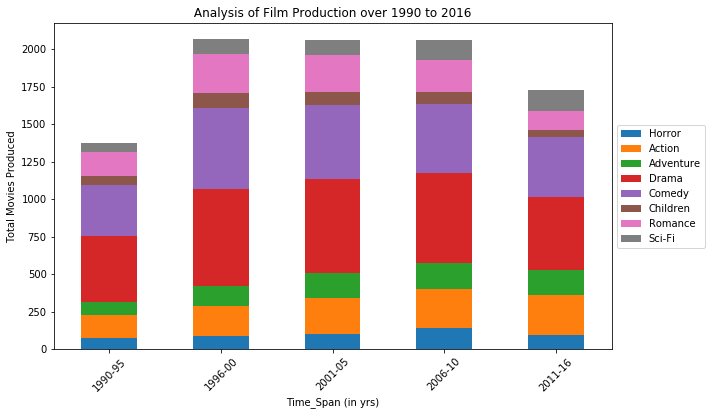

In [31]:
mygraph = dfyrs.plot(kind='bar',stacked=True, legend=True, figsize=(10,6))
mygraph.set_xlabel("Time_Span (in yrs)")
mygraph.set_ylabel("Total Movies Produced")
mygraph.legend(loc='center left', bbox_to_anchor=(1,0.5))
mygraph.set_xticklabels(['1990-95','1996-00','2001-05','2006-10','2011-16'], rotation=45)
mygraph.set_title(" Analysis of Film Production over 1990 to 2016 ")

In [32]:
#BELOW IS CODE FOR SECOND GRAPH

In [33]:
ageuser = pd.read_csv("ageusers.csv", usecols=range(0,3))
ageuser.set_index('movieId')
ageuser.dropna()
ageuser = pd.merge(ageuser,link,on='movieId')
ageuser = pd.merge(ageuser,movie,on='movieId')
ageuser = ageuser.set_index('movieId')
ageuser
#ageuser = ageuser.drop(columns=['imdbId_x','imdbId_y'])

,userId,age,imdbId,title,genres
movieId,,,,,
1821,1,20,120772,"Object of My Affection, The (1998)",Comedy|Romance
1831,1,20,120738,Lost in Space (1998),Action|Adventure|Sci-Fi
1831,2,21,120738,Lost in Space (1998),Action|Adventure|Sci-Fi
1833,1,20,120749,Mercury Rising (1998),Action|Drama|Thriller
1833,2,21,120749,Mercury Rising (1998),Action|Drama|Thriller
1834,1,20,120176,"Spanish Prisoner, The (1997)",Crime|Drama|Mystery|Thriller
1834,2,21,120176,"Spanish Prisoner, The (1997)",Crime|Drama|Mystery|Thriller
1835,1,20,120632,City of Angels (1998),Drama|Fantasy|Romance
1835,2,21,120632,City of Angels (1998),Drama|Fantasy|Romance


In [34]:
agebelow20 = ageuser[ageuser.age<=20]

hrr_age0 = agebelow20[agebelow20['genres'].str.contains('Horror')]
act_age0 = agebelow20[agebelow20['genres'].str.contains('Action')]
adv_age0 = agebelow20[agebelow20['genres'].str.contains('Adventure')]
drm_age0 = agebelow20[agebelow20['genres'].str.contains('Drama')]
com_age0 = agebelow20[agebelow20['genres'].str.contains('Comedy')]
chl_age0 = agebelow20[agebelow20['genres'].str.contains('Children')]
rom_age0 = agebelow20[agebelow20['genres'].str.contains('Romance')]
scf_age0 = agebelow20[agebelow20['genres'].str.contains('Sci-Fi')]


#agebelow20

In [35]:
age21to30 = ageuser[ageuser.age==21]
period = [22,23,24,25,26,27,28,29,30]

for a in period:
    ca = ageuser[ageuser.age==a]
    age21to30 = age21to30.append(ca)

hrr_age1 = age21to30[age21to30['genres'].str.contains('Horror')]
act_age1 = age21to30[age21to30['genres'].str.contains('Action')]
adv_age1 = age21to30[age21to30['genres'].str.contains('Adventure')]
drm_age1 = age21to30[age21to30['genres'].str.contains('Drama')]
com_age1 = age21to30[age21to30['genres'].str.contains('Comedy')]
chl_age1 = age21to30[age21to30['genres'].str.contains('Children')]
rom_age1 = age21to30[age21to30['genres'].str.contains('Romance')]
scf_age1 = age21to30[age21to30['genres'].str.contains('Sci-Fi')]


#age21to30

In [36]:
age31to40 = ageuser[ageuser.age==31]
period = [32,33,34,35,36,37,38,39,40]

for a in period:
    ca = ageuser[ageuser.age==a]
    age31to40 = age31to40.append(ca)

hrr_age2 = age31to40[age31to40['genres'].str.contains('Horror')]
act_age2 = age31to40[age31to40['genres'].str.contains('Action')]
adv_age2 = age31to40[age31to40['genres'].str.contains('Adventure')]
drm_age2 = age31to40[age31to40['genres'].str.contains('Drama')]
com_age2 = age31to40[age31to40['genres'].str.contains('Comedy')]
chl_age2 = age31to40[age31to40['genres'].str.contains('Children')]
rom_age2 = age31to40[age31to40['genres'].str.contains('Romance')]
scf_age2 = age31to40[age31to40['genres'].str.contains('Sci-Fi')]


#age31to40

In [37]:
age41to50 = ageuser[ageuser.age==41]
period = [42,43,44,45,46,47,48,49,50]

for a in period:
    ca = ageuser[ageuser.age==a]
    age41to50 = age41to50.append(ca)

hrr_age3 = age41to50[age41to50['genres'].str.contains('Horror')]
act_age3 = age41to50[age41to50['genres'].str.contains('Action')]
adv_age3 = age41to50[age41to50['genres'].str.contains('Adventure')]
drm_age3 = age41to50[age41to50['genres'].str.contains('Drama')]
com_age3 = age41to50[age41to50['genres'].str.contains('Comedy')]
chl_age3 = age41to50[age41to50['genres'].str.contains('Children')]
rom_age3 = age41to50[age41to50['genres'].str.contains('Romance')]
scf_age3 = age41to50[age41to50['genres'].str.contains('Sci-Fi')]


#age41to50

In [38]:
ageabove50 = ageuser[ageuser.age>=50]

hrr_age4 = ageabove50[ageabove50['genres'].str.contains('Horror')]
act_age4 = ageabove50[ageabove50['genres'].str.contains('Action')]
adv_age4 = ageabove50[ageabove50['genres'].str.contains('Adventure')]
drm_age4 = ageabove50[ageabove50['genres'].str.contains('Drama')]
com_age4 = ageabove50[ageabove50['genres'].str.contains('Comedy')]
chl_age4 = ageabove50[ageabove50['genres'].str.contains('Children')]
rom_age4 = ageabove50[ageabove50['genres'].str.contains('Romance')]
scf_age4 = ageabove50[ageabove50['genres'].str.contains('Sci-Fi')]


#ageabove50

In [39]:
d2 = {'age_groups':['agebelow20','age21to30','age31to40','age41to50','ageabove50'],'Horror':[len(hrr_age0),len(hrr_age1),len(hrr_age2),len(hrr_age3),len(hrr_age4)],'Action':[len(act_age0),len(act_age1),len(act_age2),len(act_age3),len(act_age4)],'Adventure':[len(adv_age0),len(adv_age1),len(adv_age2),len(adv_age3),len(adv_age4)],'Drama':[len(drm_age0),len(drm_age1),len(drm_age2),len(drm_age3),len(drm_age4)],'Comedy':[len(com_age0),len(com_age1),len(com_age2),len(com_age3),len(com_age4)],'Children':[len(chl_age0),len(chl_age1),len(chl_age2),len(chl_age3),len(chl_age4)],'Romance':[len(rom_age0),len(rom_age1),len(rom_age2),len(rom_age3),len(rom_age4)],'Sci-Fi':[len(scf_age0),len(scf_age1),len(scf_age2),len(scf_age3),len(scf_age4)]}

dfags = pd.DataFrame(data=d2)
dfags

,age_groups,Horror,Action,Adventure,Drama,Comedy,Children,Romance,Sci-Fi
0,agebelow20,5,39,73,36,58,54,9,24
1,age21to30,37,37,22,63,29,3,20,30
2,age31to40,55,35,15,87,27,0,22,26
3,age41to50,5,25,16,110,58,8,37,6
4,ageabove50,10,20,21,120,72,26,44,12


Text(0.5,1,' Agewise Analysis of Film Production ')

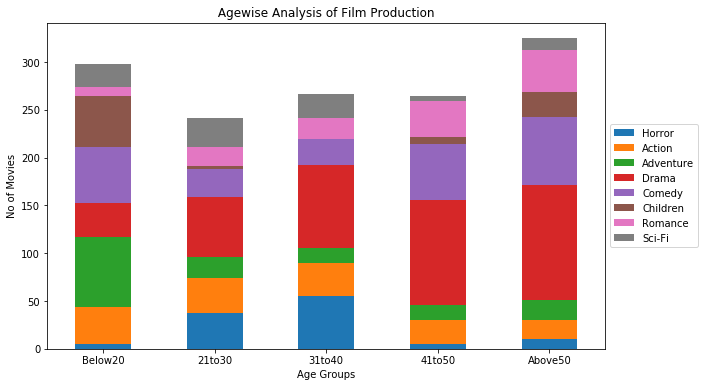

In [40]:
scndgraph = dfags.plot(kind='bar',stacked=True, legend=True, figsize=(10,6))
scndgraph.set_xlabel("Age Groups")
scndgraph.set_ylabel("No of Movies")
scndgraph.legend(loc='center left', bbox_to_anchor=(1,0.5))
scndgraph.set_xticklabels(['Below20','21to30','31to40','41to50','Above50'], rotation=0)
scndgraph.set_title(" Agewise Analysis of Film Production ")